In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tabulate import tabulate

In [2]:
# Reading data
data = pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Unique values count for each column
table=[]
for col in data.columns:
    row=[col, data[col].nunique()]
    table.append(row)
print(tabulate(table, headers=["Column", "No. of Unique Values"]))

Column              No. of Unique Values
----------------  ----------------------
customerID                          7043
gender                                 2
SeniorCitizen                          2
Partner                                2
Dependents                             2
tenure                                73
PhoneService                           2
MultipleLines                          3
InternetService                        3
OnlineSecurity                         3
OnlineBackup                           3
DeviceProtection                       3
TechSupport                            3
StreamingTV                            3
StreamingMovies                        3
Contract                               3
PaperlessBilling                       2
PaymentMethod                          4
MonthlyCharges                      1585
TotalCharges                        6531
Churn                                  2


In [5]:
# Dropping unnecessary columns
data.drop("customerID", axis=1, inplace=True)

In [6]:
# Converting 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [7]:
# Handling missing values
print(data.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
data=data.dropna()

In [9]:
# Removing duplicates
data=data.drop_duplicates()

In [10]:
# Descriptive statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# Handling outliers
table=[]
for col in data.select_dtypes(include="number"):
    IQR=data[col].quantile(0.75)-data[col].quantile(0.25)
    lower=data[col].quantile(0.25) - 1.5*IQR
    upper=data[col].quantile(0.75) + 1.5*IQR
    outlier=(data[col]<=lower)|(data[col]>=upper)
    outlier_percentage=(data[outlier].shape[0]/data.shape[0])*100
    row=[col, outlier_percentage]
    table.append(row)
print(tabulate(table,headers = ['Column', 'Outlier_Percentage'] ))

Column            Outlier_Percentage
--------------  --------------------
SeniorCitizen                    100
tenure                             0
MonthlyCharges                     0
TotalCharges                       0


In [12]:
# Skewness and Kurtosis
table=[]
for col in data.select_dtypes(include="number"):
    row= [col, data[col].skew(), data[col].kurt()]
    table.append(row)
print(tabulate(table, headers=['Column', 'Skewness', 'Kurtsis']))

Column            Skewness    Kurtsis
--------------  ----------  ---------
SeniorCitizen     1.82745    1.33996
tenure            0.23374   -1.38853
MonthlyCharges   -0.225686  -1.25284
TotalCharges      0.958322  -0.238373


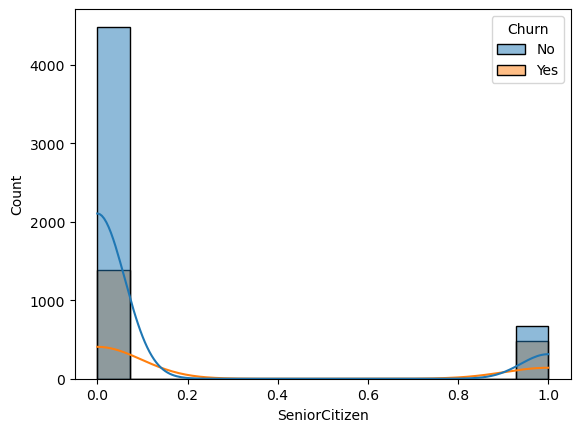

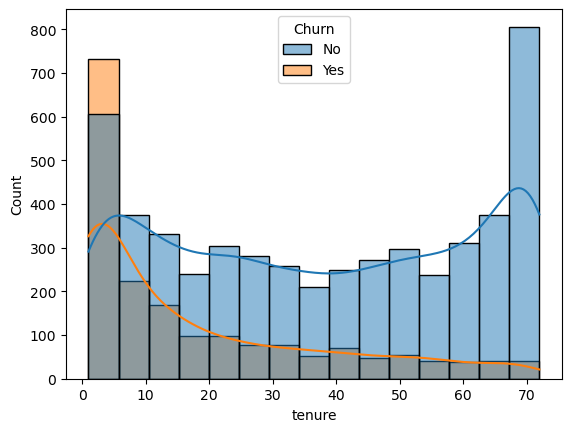

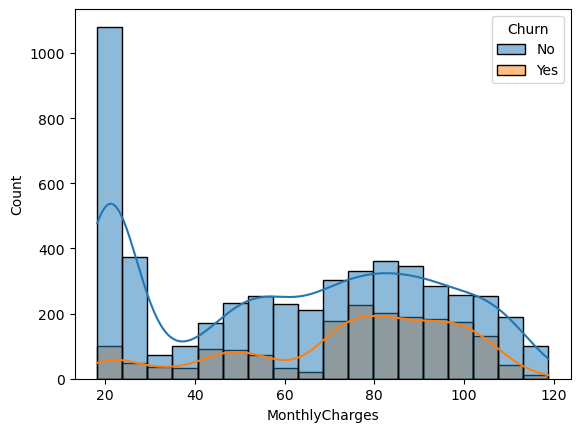

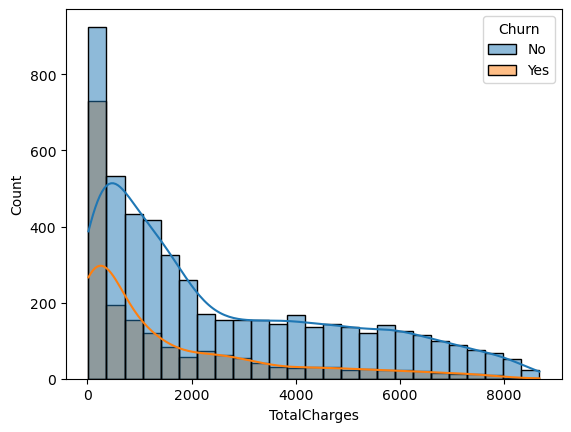

In [13]:
# Visualizing distribution of numerical columns
for col in data.select_dtypes(include="number"):
    sns.histplot(x=col, data=data, hue='Churn', kde=True)
    plt.show()

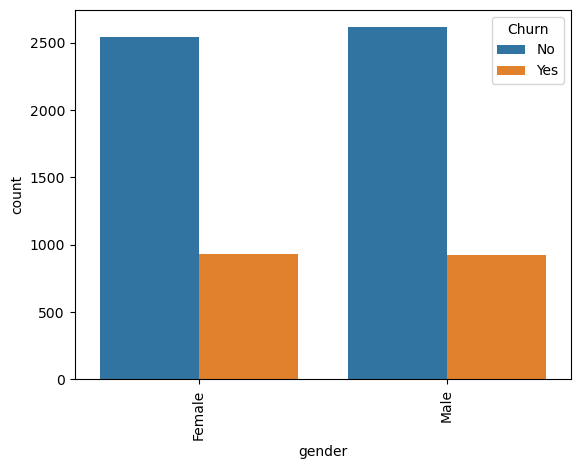

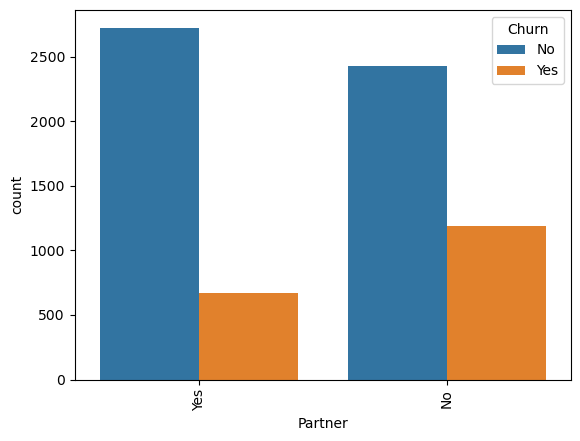

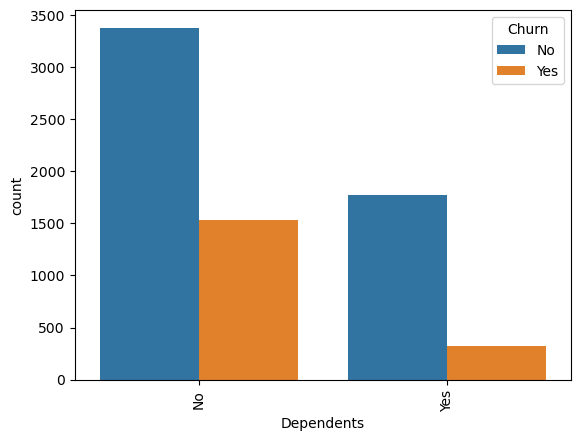

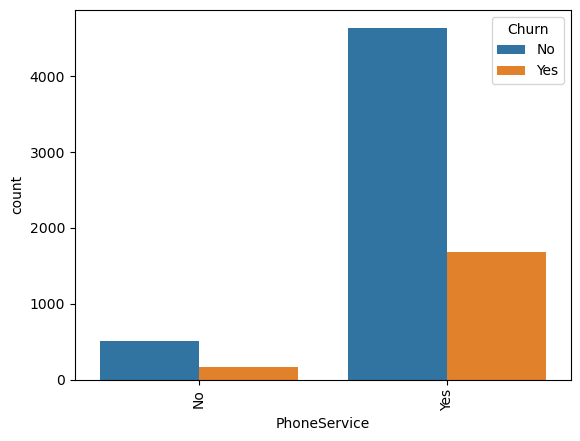

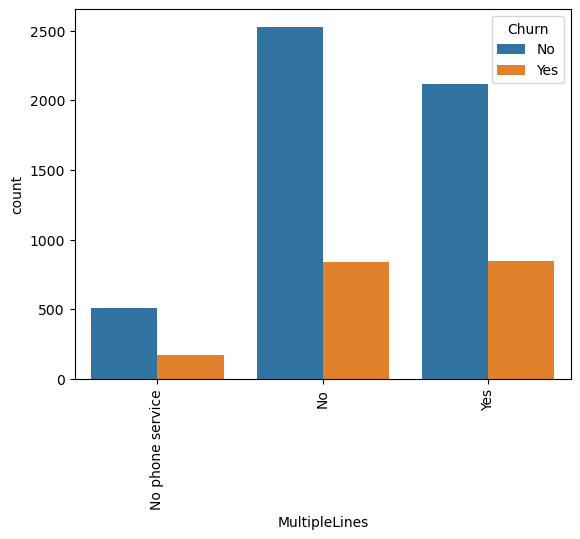

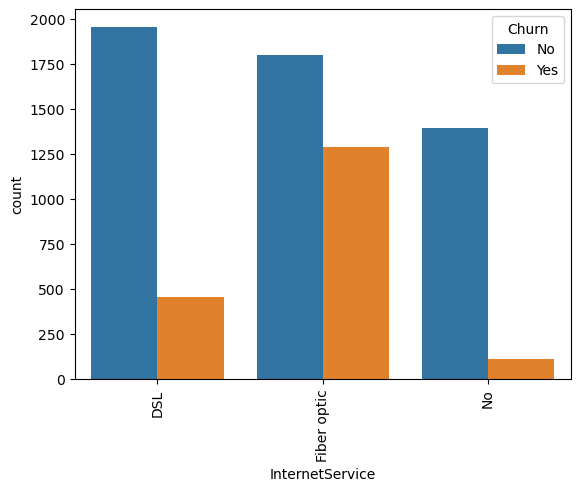

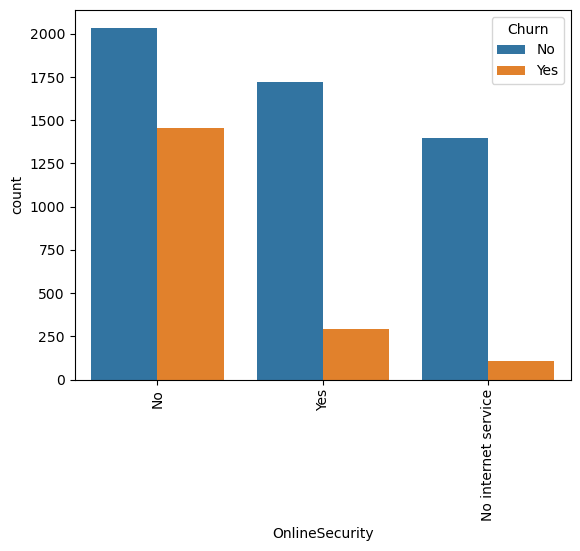

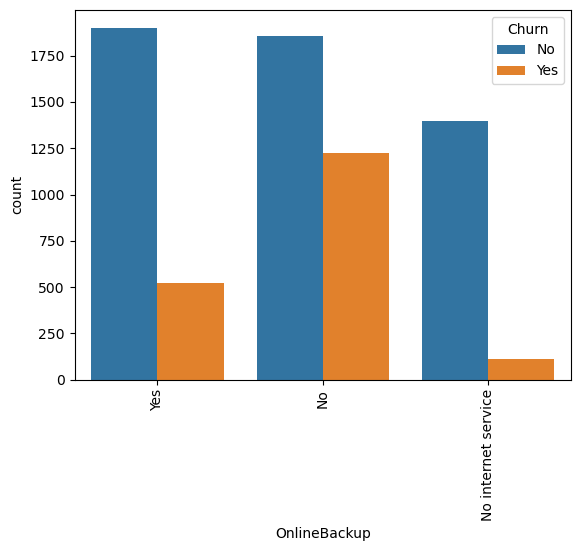

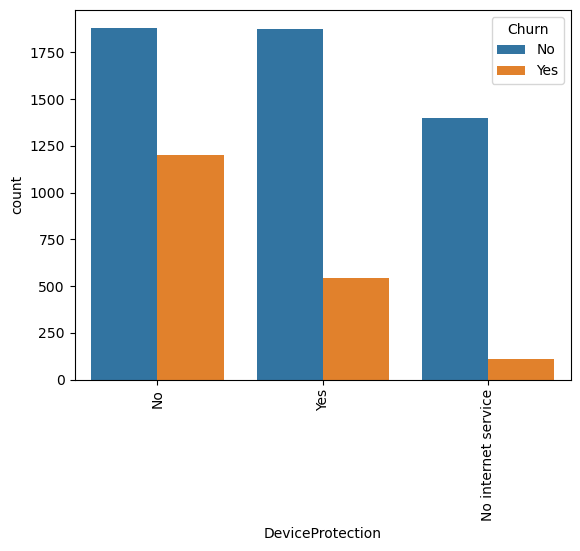

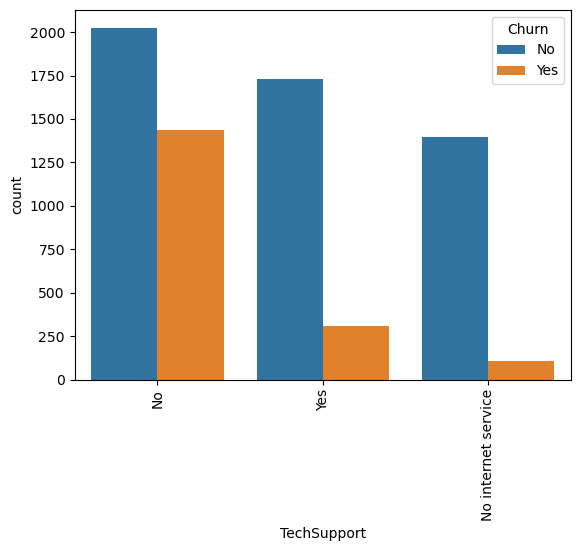

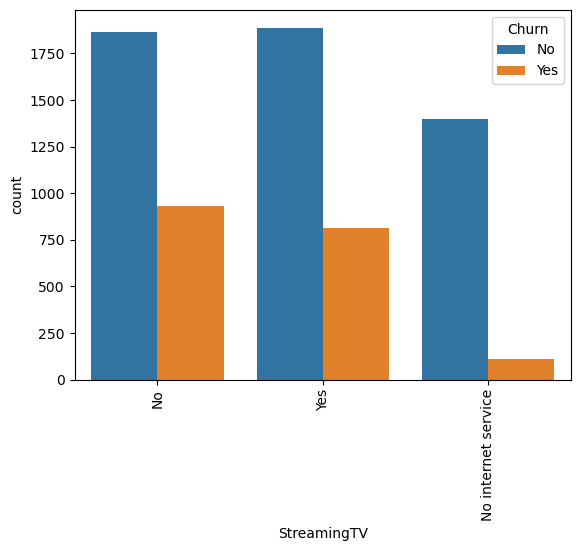

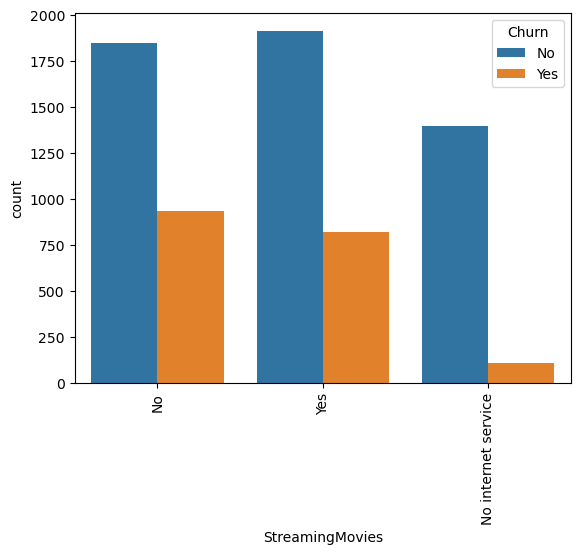

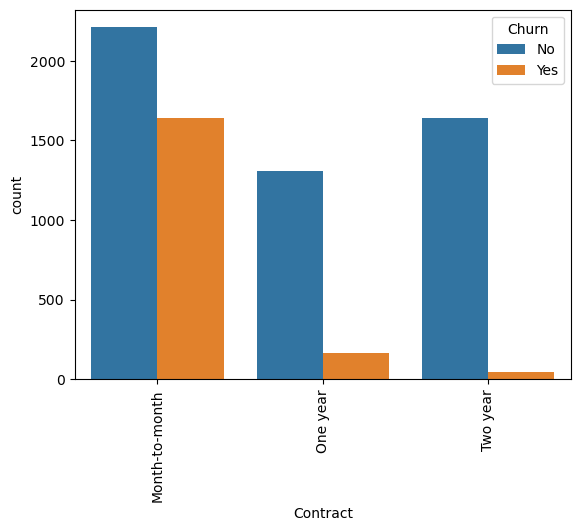

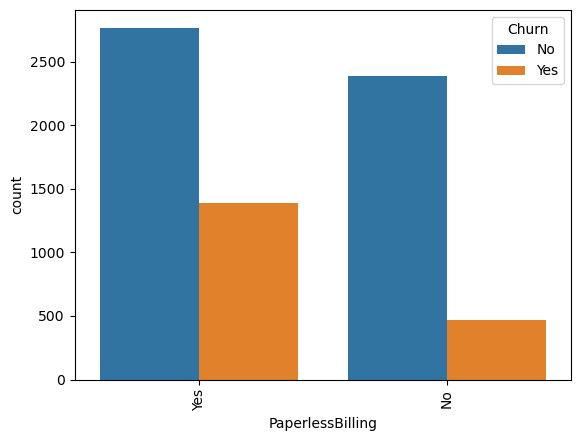

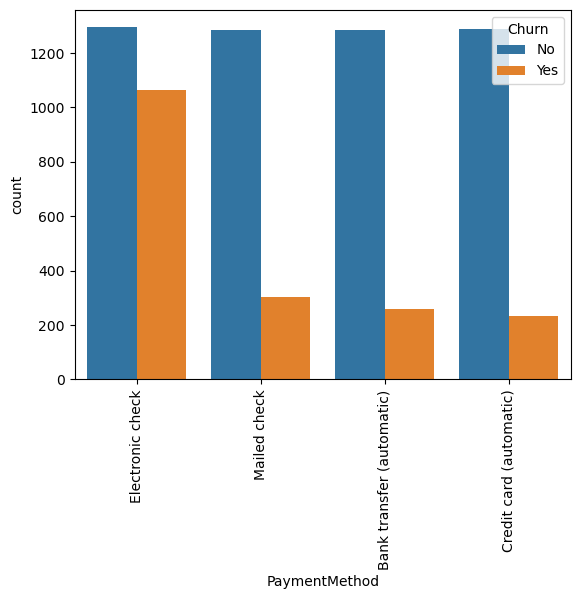

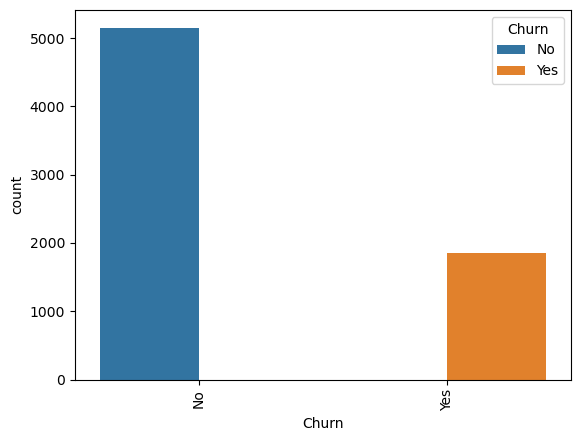

In [14]:
# Visualizing count of categorical columns
for col in data.select_dtypes(include="object"):
    sns.countplot(x=col, data=data, hue='Churn')
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

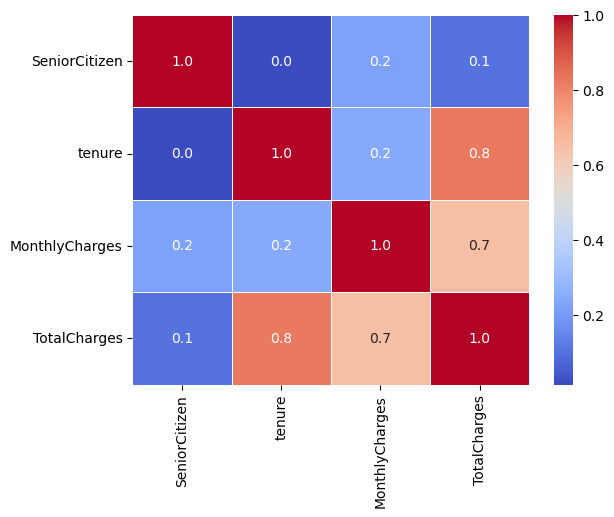

In [15]:
# Correlation heatmap
data.corr()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)

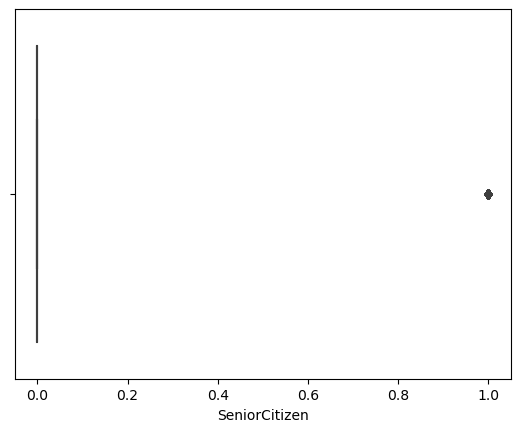

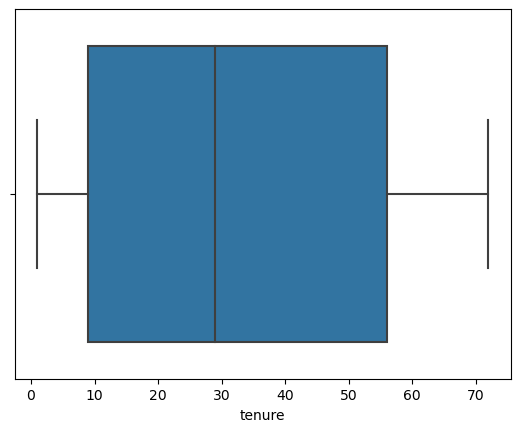

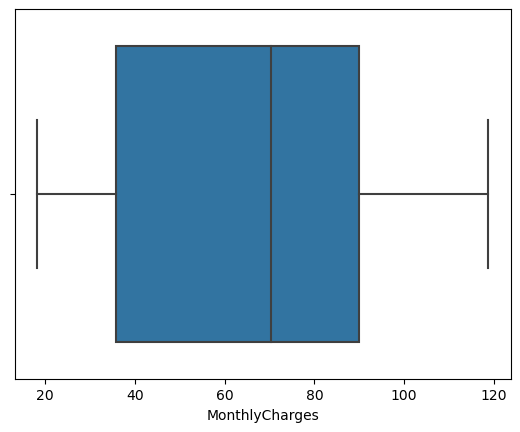

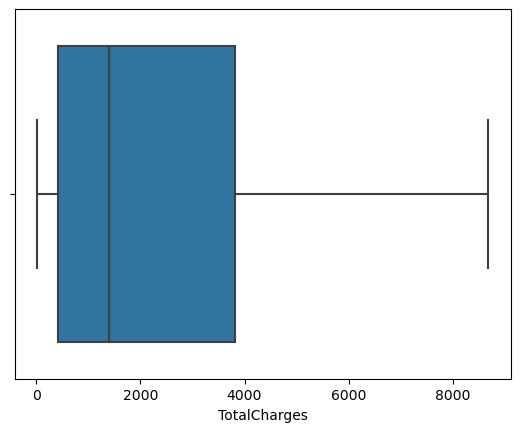

In [16]:
# Boxplot for numerical columns
for col in data.select_dtypes(include="number"):
    sns.boxplot(x=col, data=data)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


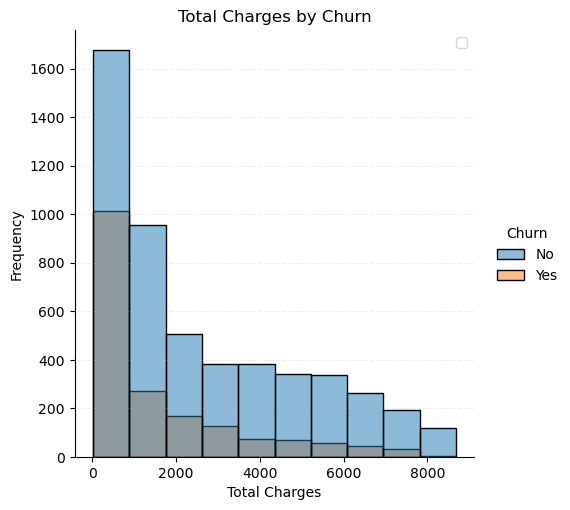

In [17]:
# Visualizing distribution of 'TotalCharges' by 'Churn'
sns.displot(x=data['TotalCharges'], hue='Churn', data=data, bins=10)
plt.title('Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


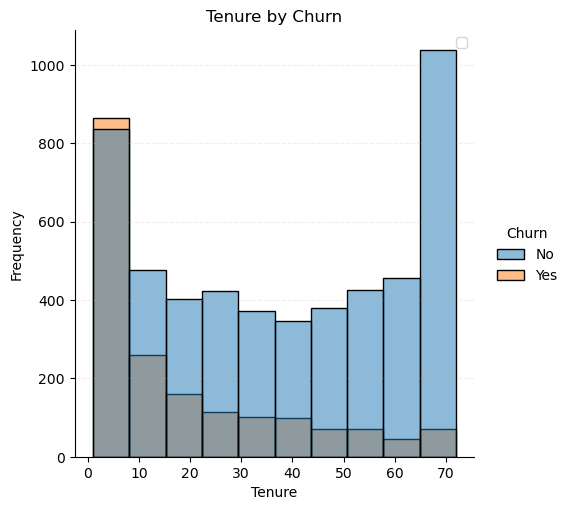

In [18]:
# Visualizing distribution of 'tenure' by 'Churn'
sns.displot(x=data['tenure'], hue='Churn', data=data, bins=10)
plt.title('Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


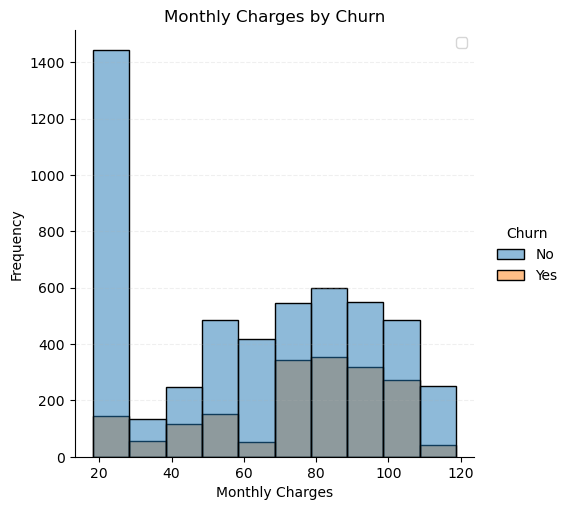

In [19]:
# Visualizing distribution of 'MonthlyCharges' by 'Churn'
sns.displot(x=data['MonthlyCharges'], hue='Churn', data=data, bins=10)
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

In [20]:
# Handling categorical variables
data_copy=data
dict={'No phone service':0,'No':0, 'Yes':1,'No internet service':0, 'DSL': 1, 'Fiber optic': 1 }
for col in ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
 data_copy[col]=data_copy[col].map(dict)

In [21]:
# Creating a new feature 'No_of_Services'
data_copy['No_of_Services']=0
for col in ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    data_copy['No_of_Services'] += data_copy[col] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


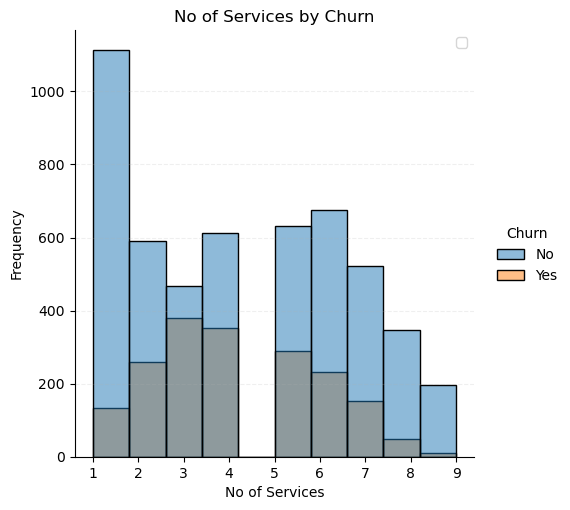

In [22]:
# Visualizing 'No_of_Services' by 'Churn'
sns.displot(x=data_copy['No_of_Services'], hue='Churn', data=data_copy, bins=10)
plt.title('No of Services by Churn')
plt.xlabel('No of Services')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

In [23]:
# Encoding categorical variables
data_encoded=data
label_encoder = LabelEncoder()
for col in data.select_dtypes(include="object"):
 data_encoded[col] = label_encoder.fit_transform(data[col])

data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No_of_Services
0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,2,29.85,29.85,0,2
1,1,0,0,0,34,1,0,1,1,0,...,0,0,0,1,0,3,56.95,1889.50,0,4
2,1,0,0,0,2,1,0,1,1,1,...,0,0,0,0,1,3,53.85,108.15,1,4
3,1,0,0,0,45,0,0,1,1,0,...,1,0,0,1,0,0,42.30,1840.75,0,4
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,2


In [24]:
# Scaling numerical variables
data_scaled=data_encoded
scaler = MinMaxScaler()
Columns=data_encoded.columns
for col in Columns:
    data_scaled[col] = scaler.fit_transform(data_encoded[[col]])

In [25]:
# Splitting data into training and testing sets
churn=data_scaled['Churn']
data=data.drop('Churn' ,axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, churn, test_size=0.2, random_state=42)

In [26]:
# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.4f}')

Logistic Regression: Accuracy = 0.8210
Decision Tree: Accuracy = 0.7311
Random Forest: Accuracy = 0.8117
Support Vector Machine: Accuracy = 0.8060
KNN: Accuracy = 0.7596


C:\Users\welcome\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Logistic_Regression = LogisticRegres   sion()
grid_search = GridSearchCV(Logistic_Regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 100}
Best score: 0.7965355925842885


In [28]:
# Hyperparameter tuning for Support Vector Machine
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}  # Parameter grid for SVM
svm = SVC()  # Initialize Support Vector Machine model
grid_search = GridSearchCV(svm, param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to the data
print("Best parameters:", grid_search.best_params_)  # Print the best parameters found by grid search
print("Best score:", grid_search.best_score_)  # Print the best score achieved by the model

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.792789732874741


In [29]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # List of neighbor counts to try
knn = KNeighborsClassifier()  # Initialize KNN model
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to the data
print("Best parameters:", grid_search.best_params_)  # Print the best parameters found by grid search
print("Best score:", grid_search.best_score_)  # Print the best score achieved by the model

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

Best parameters: {'n_neighbors': 11}
Best score: 0.7578417856478412


C:\Users\welcome\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
# Hyperparameter tuning for Decision Tree
param_grid = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]}  # Parameter grid for Decision Tree
dtc = DecisionTreeClassifier()  # Initialize Decision Tree model
grid_search = GridSearchCV(dtc, param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to the data
print("Best parameters:", grid_search.best_params_)  # Print the best parameters found by grid search
print("Best score:", grid_search.best_score_)  # Print the best score achieved by the model

Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Best score: 0.7603409866095494


In [31]:
# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}  # Parameter grid for Random Forest
rfc = RandomForestClassifier()  # Initialize Random Forest model
grid_search = GridSearchCV(rfc, param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to the data
print("Best parameters:", grid_search.best_params_)  # Print the best parameters found by grid search
print("Best score:", grid_search.best_score_)  # Print the best score achieved by the model

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.7958225801065703


In [32]:
# Training Logistic Regression model with best parameters
Logistic_Regression.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predictions and evaluation metrics for Logistic Regression
y_pred = Logistic_Regression.predict(X_test)  # Predictions
y_pred_proba = Logistic_Regression.predict_proba(X_test)[:, 1]  # Probability of positive class
accuracy = accuracy_score(y_test, y_pred)  # Accuracy
precision = precision_score(y_test, y_pred, average='weighted')  # Precision
recall = recall_score(y_test, y_pred, average='weighted')  # Recall
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-score
conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # ROC curve
roc_auc = auc(fpr, tpr)  # AUC-ROC
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("AUC-ROC:", roc_auc)

Accuracy: 0.8209700427960057
Precision: 0.8160495505205487
Recall: 0.8209700427960057
F1-score: 0.8181442303928015
Confusion Matrix:
 [[969 112]
 [139 182]]
AUC-ROC: 0.8503260797519315
